<a href="https://colab.research.google.com/github/Nada-Naveesh/Data_Visualization_LAB/blob/main/222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

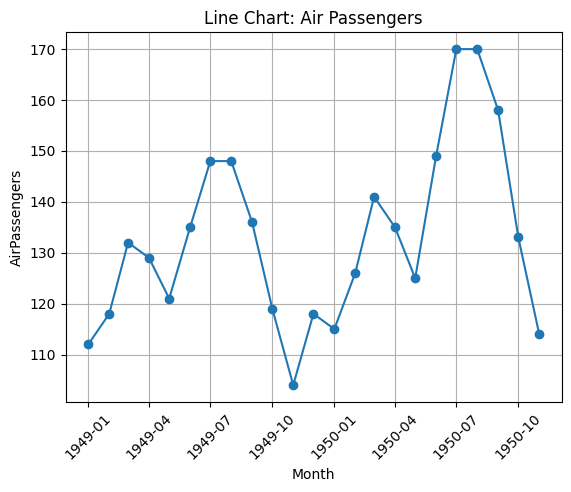

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Airqq.csv", parse_dates=["Month"])
df["Month_str"] = df["Month"].dt.strftime('%b')
plt.plot(df["Month"],df["AirPassengers"],marker='o')
plt.title("Line Chart: Air Passengers")
plt.xlabel("Month")
plt.ylabel("AirPassengers")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

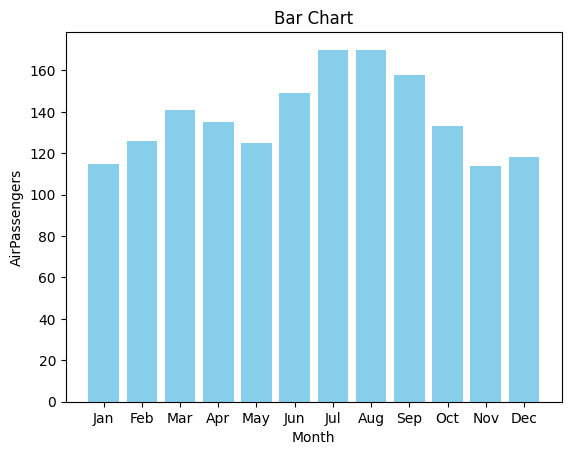

In [2]:

plt.bar(df["Month_str"],df["AirPassengers"],color='skyblue')
plt.title("Bar Chart")
plt.xlabel("Month")
plt.ylabel("AirPassengers")
plt.show()

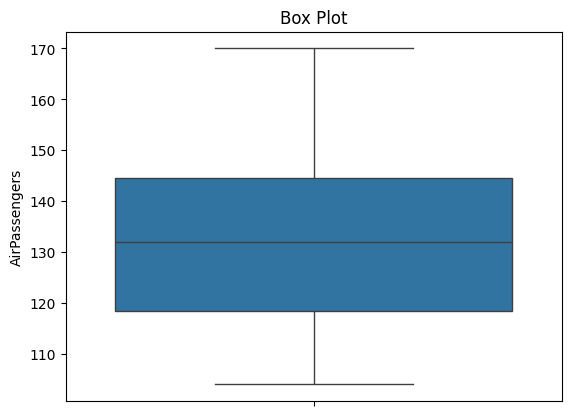

In [3]:
import seaborn as sns
sns.boxplot(y=df["AirPassengers"])
plt.title("Box Plot")
plt.show()


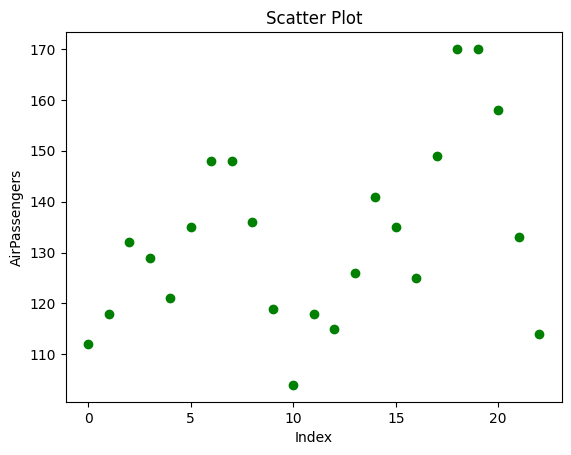

In [4]:

plt.scatter(df.index, df["AirPassengers"], color='green')
plt.title("Scatter Plot")
plt.xlabel("Index")
plt.ylabel("AirPassengers")
plt.show()

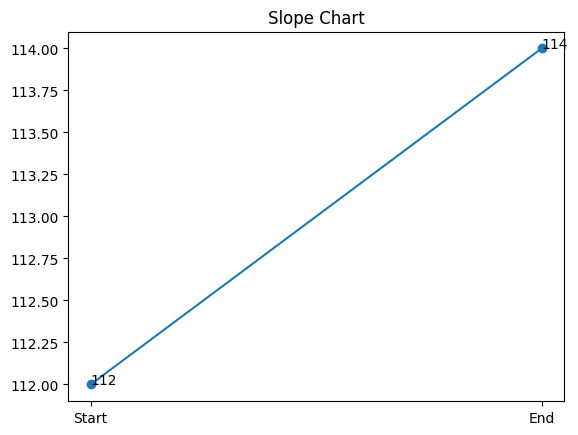

In [6]:
df2=df.iloc[[0,-1]]
plt.plot(["Start","End"],df2["AirPassengers"],marker='o')
for i in range(df2.shape[0]):
    plt.text(x=i,y=df2["AirPassengers"].iloc[i],s=df2["AirPassengers"].iloc[i])
plt.title("Slope Chart")
plt.show()


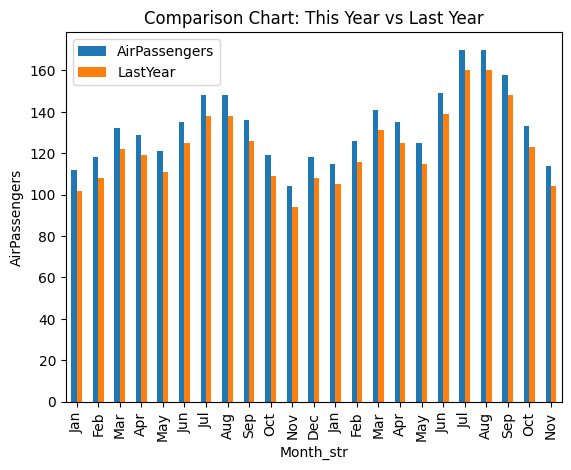

In [9]:
df["LastYear"]=df["AirPassengers"]-10
df[["Month_str","AirPassengers","LastYear"]].set_index("Month_str").plot(kind="bar")

plt.title("Comparison Chart: This Year vs Last Year")
plt.ylabel("AirPassengers")
plt.show()


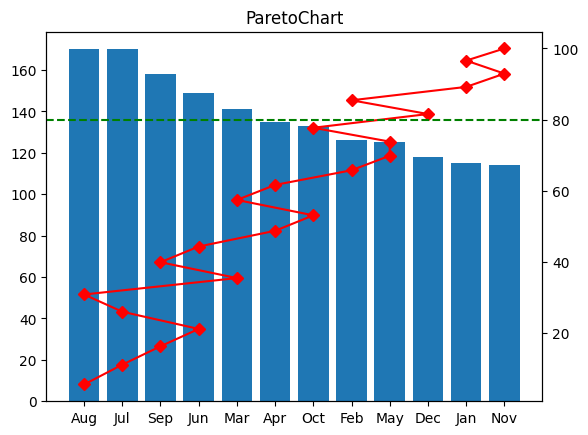

In [11]:
df_sorted=df.sort_values("AirPassengers",ascending=False)
df_sorted["cum_pct"]=df_sorted["AirPassengers"].cumsum()/df_sorted["AirPassengers"].sum()*100
fig, ax1=plt.subplots()
ax1.bar(df_sorted["Month_str"],df_sorted["AirPassengers"])
ax2 = ax1.twinx()
ax2.plot(df_sorted["Month_str"],df_sorted["cum_pct"],color="red",marker="D")
ax2.axhline(80, color="green", linestyle="dashed")
plt.title("ParetoChart")
plt.show()


In [14]:
import plotly.graph_objects as go

fig =go.Figure()
fig.add_trace(go.Scatterpolar(r=df["AirPassengers"],theta=df["Month_str"],fill='toself', name='AirPassengers'))
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=False,title="Radar Chart")
fig.show()

In [16]:
fig = go.Figure(go.Barpolar(r=df["AirPassengers"], theta=df["Month_str"], marker_color=df["AirPassengers"],marker_line_color="black",marker_line_width=1))
fig.update_layout(title="RadialBarChart",polar=dict(radialaxis=dict(visible=True)))
fig.show()

In [18]:
fig =go.Figure(data=[go.Sankey(
node=dict(label=["Online","Travel","AirlineA","AirlineB"]), link = dict(source=[0, 1], target=[2, 3], value=[120, 80]))])
fig.update_layout(title="SankeyChart")
fig.show()


In [19]:
fig=go.Figure(go.Sunburst(labels=["Total","2022","Jan","Feb"],parents=["","Total", "2022", "2022"], values=[1000, 500, 250, 250]))
fig.update_layout(title="SunburstChart")
fig.show()


In [20]:
fig=go.Figure(go.Indicator(mode="gauge+number",value=150,title={'text':"GaugeChart"}, gauge={'axis': {'range': [0, 200]}}))
fig.show()


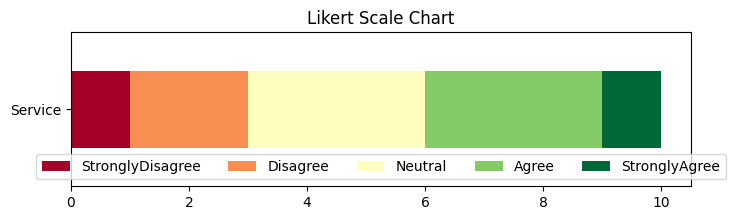

In [23]:
data={'StronglyDisagree':[1],'Disagree':[2], 'Neutral':[3],'Agree':[3],'StronglyAgree':[1]}
df_likert = pd.DataFrame(data, index=["Service"])
df_likert.plot(kind="barh",stacked=True,colormap="RdYlGn",figsize=(8,2))
plt.title("Likert Scale Chart")
plt.legend(loc="lower center",ncol=5)
plt.show()

In [25]:
import plotly.graph_objects as go
x_labels = df["Month_str"][:5]
y_values = df["AirPassengers"][:5].tolist()
measures=["relative"]*(len(y_values)-1)+["total"]
fig=go.Figure(data=[go.Waterfall(name="AirPassengers",orientation="v",x=x_labels,y=y_values, measure=measures, connector={"line": {"color": "gray"}},
increasing={"marker":{"color":"green"}}, decreasing={"marker":{"color":"red"}},totals={"marker":{"color":"blue"}})])
fig.update_layout(title="WaterfallChart(First5Months)",showlegend=False)
fig.show()